# Factor analysis on loan completation
## by Eduardo Burgoa

## Investigation Overview

The investigations has focused on answering the following questions about loans completation.

- How many loans are not completely returned?
- Which factors are related to the rate to pay for a loan?
- What factors of the borrower are related to completation of loans?


## Dataset Overview

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df_closed = df.query('ClosedDate == ClosedDate')


In [3]:
ids = range(0, 21)
df_category = pd.DataFrame({
    'ListingCategory (numeric)': ids,
    'ListingCategoryName': ['0-Not Available', 
                 '01-Debt Consolidation',
                 '02-Home Improvement',
                 '03-Business',
                 '04-Personal Loan',
                 '05-Student Use',
                 '06-Auto',
                 '07-Other',
                 '08-Baby&Adoption',
                 '09-Boat',
                 '10-Cosmetic Procedure',
                 '11-Engagement Ring',
                 '12-Green Loans',
                 '13-Household Expenses',
                 '14-Large Purchases',
                 '15-Medical/Dental',
                 '16-Motorcycle',
                 '17-RV',
                 '18-Taxes',
                 '19-Vacation',
                 '20-Wedding Loans']
    })
df_closed = df_closed.merge(df_category, how='inner', on='ListingCategory (numeric)')

In [4]:
# For easier ploting I am adding a new feature IsCompleted
df_closed['IsCompleted'] = False
df_closed.loc[df_closed['LoanStatus'] == 'Completed', 'IsCompleted'] = True

## How many loans are not completely returned?

We have 4 different status for a closed loan: Completed, Defaulted, Chargedoff and Cancelled. More than 30% of loans are not completely returned.

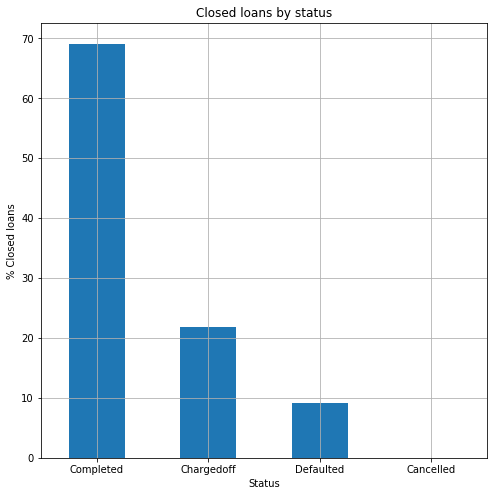

In [5]:
proportion = df_closed.LoanStatus.value_counts()/df_closed.shape[0]*100

proportion.plot('bar', figsize=(8,8))
plt.title('Closed loans by status')
plt.xlabel('Status')
plt.ylabel('% Closed loans')
plt.xticks(rotation=0)
plt.grid();

## Which factors are related to the rate to pay for a loan?

- Ratings are highly correlated with the rate of a Loan. 
- Within the same rating loans with higher are related with loans that close incompleted.

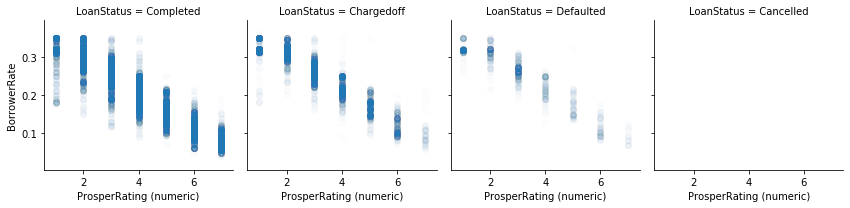

In [8]:
g = sb.FacetGrid(data = df_closed, col = 'LoanStatus', margin_titles = True)
g.map(plt.scatter, 'ProsperRating (numeric)', 'BorrowerRate', alpha=0.01);


## What factors of the borrower are related to completation of loans?

Main factors related to the borrower are the reason of borrowing the loan an their employment situation.
Combining bith factors we can know which loans have more completation.

We can identify `GreenLoans` and `Household Expenses` as having the worst completation on `Other` employment `Retired` and `Self-Employment`. 

`Full-time` employees are the best completing loans except for `Household Expenses` which is only 47%.

Completation of `Vacation` is high except for `Other` which is only 50% and `Not employed` which is 0%. How can someone withouth a job ask for a vacation loan? 

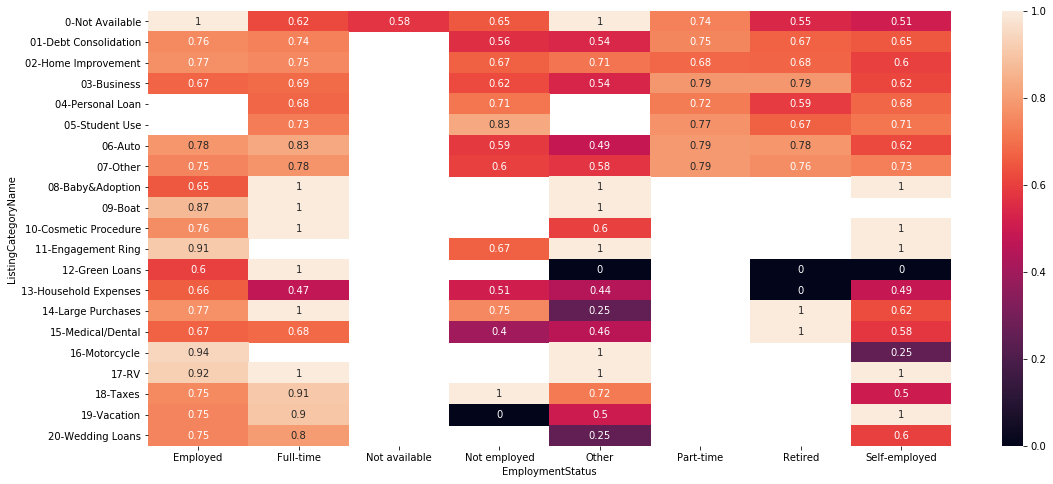

In [6]:
proportion = (df_closed.groupby(['ListingCategoryName', 'EmploymentStatus'])['IsCompleted'].mean()).unstack()

plt.figure(figsize=[18, 8])
sb.heatmap(data=proportion, annot=True);